** Dennis Yiaile Project, PHYS104**

### This file contains the montly rainfall of India as recorded by different stations in India from 1901 to 2015. The goal of this project is to determine the months that India received high rainfall and the months that India received low rainfall. I also aim to identify the year from 1901 to 2015 that in India received high rainfall and low rainfall. 

In [1]:
#Import the libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Element 1

In [2]:
#Read the css file
rainfall = pd.read_csv("rainfall_in_india_1901-2015.csv", delimiter = "," )  

#### After reading the file, I want to return my table to see the data in it. You will need to scroll horizontally to see all the columns.

In [3]:
rainfall    #returning the content of the table

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


#### Now I'm returning the first eight rows of the table

In [4]:
rainfall.head(8)   #returning the first eight rows in the table

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7


If you didn't see all the columns in the above cells, don't worry I have simplified this for you, below are the name of columns in my table.

In [5]:
rainfall.columns #returning the table columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec'],
      dtype='object')

Good that you saw all the columns. I'm not comfortable with columns that have been written in capital laters or abbreviated. I have decided to play with some codes and rename my columns in the cell below.

In [6]:
'''This code renames columns and returns the new columns'''

rainfall.columns = ["Subdivision", "Year", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "Annual", "Jan-Feb", "Mar-May", "Jun-Sep", "Oct-Dec"] #renaming columns
rainfall.columns     #returning the new columns

Index(['Subdivision', 'Year', 'January', 'February', 'March', 'April', 'May',
       'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Annual', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec'],
      dtype='object')

Now I'm returning the first 5 raws to see if the columns changed using the attribute head()

In [7]:
rainfall.head() #returning the first five raws containing the new columns

,Subdivision,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


### Element 2


**Using loc and np.where methods**

Now I want to use loc to find a subset of my data

In [8]:
rainfall.loc[[5]] #returning the raw on the 5th position(sixth raw)

,Subdivision,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9


In [9]:
rainfall.loc[4:9] #returning all the items from the fifth to the tenth raw(position 4 to 9 raw) 

,Subdivision,Year,January,February,March,April,May,June,July,August,September,October,November,December,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


Great, now I want to return all the raws and a subset of columns from Year to December using loc.

In [10]:
rainfall.loc[:,"Year":"December"]

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4112,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4113,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4114,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3






Now, I want to return a specific subset of raws and columns using loc. Since I be will be dealing with months, I want to return the columns for the years and the 12 months only.

In [11]:
rainfall.loc[15:25,"Year":"December"]  #returning raws from position 15th to 25th and columns
                                       #from Year to December

,Year,January,February,March,April,May,June,July,August,September,October,November,December
15,1917,8.0,3.6,112.0,4.5,295.9,301.1,394.8,437.4,471.8,238.1,108.3,236.9
16,1918,77.4,6.9,11.4,10.7,729.3,710.8,200.9,455.4,303.3,227.0,366.9,175.0
17,1919,10.2,18.0,0.0,35.5,283.9,542.5,246.5,259.8,170.7,186.2,340.4,258.4
18,1920,122.3,7.4,3.1,13.0,237.4,546.9,294.4,467.4,505.4,397.5,262.9,85.5
19,1921,13.2,3.1,0.0,37.5,351.2,282.7,487.1,330.0,581.2,360.7,118.2,41.5
20,1922,245.3,34.3,15.6,323.1,289.7,506.1,425.8,307.4,511.7,162.0,541.0,192.2
21,1923,79.5,0.0,NaN,91.3,293.5,808.4,636.9,182.2,560.5,131.9,197.4,70.6
22,1924,28.7,0.0,14.8,89.7,191.2,261.2,493.3,290.9,251.2,331.1,378.6,NaN
23,1925,36.6,0.0,8.6,50.4,282.2,663.8,241.8,278.2,201.9,249.5,271.5,196.0
24,1926,122.1,0.0,0.0,0.5,198.4,370.0,195.3,523.7,719.3,443.8,148.4,560.7


#### I understand that I have not used np.where in element 2. Don't worry about that. I have employed np.where and loc in the next elements specifically element 3. Therefore, note that element 3 contain some contents of element 2.

### Element 3   and Test Suite

**Using classes, methods, for loops, and np.where**

Now, I want to find the total amount of rainfall received in each month for all the years. I have decided to use a class, methods, and for loops. This code contains a method that returns the length of the array that I will be taking as my input and a method that prints the sum of monthly rainfall for all the years in a statement.

In [12]:
'''This code calculates the total amount of rainfall received in each month for all the years. 
Also, this code returns the length of the  array that I will be taking as my input and 
print the total monthly rainfall for all the years in a statement.'''




class Monthly():                    #creating a class called monthly
    def __init__(self, mymonths):   #"dunder" method with one attribute
        self.mymonths = mymonths    #instant attribute
  
    def monthlysum(self):           #this method returns the total monthly rainfall for all the years
        for i in self.mymonths:     #creating a for loop
            monthlyrainfall = rainfall[i].dropna()   #removing all unrecorded data
            sumeachmonth = sum(monthlyrainfall)       #summing monthly rainfall 
            print ("The total rainfall received in %s for all the years is %d." %(i, sumeachmonth))  #printing the total sum in a statement
        
    def length(self):              #this method returns the length of my input in a statement 
        length = len(self.mymonths)                        #calculating the length of my input
        return("The length of this data is %s." %(length)) #returning the length 


Now I want to test my class and methods by calling them

In [13]:
months = rainfall.columns[2:14]   #creating an array for all the columns from the 2nd to the 14th position
                                  #and assigning it to a variable months
months                            #returning the columns containing my months names

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

In [14]:
mydata = Monthly(months) #Instantiate mydata as a object in the class "Monthly"
mydata.monthlysum()      #calling my "monthlysum()" method

The total rainfall received in January for all the years is 77952.
The total rainfall received in February for all the years is 89685.
The total rainfall received in March for all the years is 112446.
The total rainfall received in April for all the years is 177340.
The total rainfall received in May for all the years is 352670.
The total rainfall received in June for all the years is 946493.
The total rainfall received in July for all the years is 1426703.
The total rainfall received in August for all the years is 1193563.
The total rainfall received in September for all the years is 811157.
The total rainfall received in October for all the years is 392438.
The total rainfall received in November for all the years is 163650.
The total rainfall received in December for all the years is 77482.


In [15]:
mydata.length()   #calling my "length()" method.

'The length of this data is 12.'

Looking at these values, it seems like India received higher rainfall from May to September and lower rainfall from November to March. Specifically, the highest rainfal is received in July while the lowest is received in December. 

Now I want to return all the raws for the December and July columns.

In [16]:
rainfall[["December"]]   #returning all the raws of december column

,December
0,33.6
1,160.5
2,225.0
3,40.1
4,344.7
...,...
4111,14.9
4112,8.8
4113,26.7
4114,62.3


In [17]:
rainfall[["July"]]  ##returning all the raws of july column

,July
0,365.1
1,228.9
2,728.4
3,502.0
4,368.7
...,...
4111,350.2
4112,231.5
4113,296.4
4114,116.1


This time round I'm return the maximum and minimum of all the July and December rainfall in a statement. Remember that my goal was to indetify the months and year in which India received high and Low rainfall. I'm using July and December because they have the largest and smallest total amount of rainfall respectively. You will understand in the next cells how the min and max for these months is helpful.

In [18]:
#returning the maximum and minimum rainfall received in july for all the years.
print("The maximum rainfall in July for all the years is", max(rainfall.July), "and the minimum is", min(rainfall.July))

The maximum rainfall in July for all the years is 2362.8 and the minimum is 0.0


In [19]:
#returning the maximum and minimum rainfall received in December for all the years
print("The maximum rainfall in December for all the years is", max(rainfall.December), "and the minimum is", min(rainfall.December))

The maximum rainfall in December for all the years is 617.5 and the minimum is 0.0


Now I'm going to calculate the maximum of each month in a loop, sum all of them, and calculate the medium using np.percentile. I will use this medium to come up with the name of months during which India experience high and low rainfall.

In [20]:
'''This code returns the medium of all the maximum amount of rainfall received in each month'''

months = rainfall.columns[2:14]  #creating an array containing names of all months and naming it 'months'
totalmaxima =[]                  #creating an empty array 'totalmaxima'
for m in range(len(months)):     #using for loops within the range of 'months' length
    allmax = max(rainfall[months[m]])    #calculating maximum for each month
    totalmaxima.append(allmax)    #adding maximum values to our array
medium_max = np.percentile(totalmaxima, 50)  #calculating the medium of all maximum values
print(medium_max)                            #printing the medium value

798.5999999999999


In [21]:
'''This code returns the months that India receives high rainfall and low rainfall'''

#These first section code prints high rainfall months

print("The months that India receives higher rainfall are....") #printing statement
for m in range(len(months)):             #using for loops within the range of 'months' length
    allmax = max(rainfall[months[m]])    #calculating maximum for each month
    if (allmax > medium_max):            #maximum greater than medium
        print(months[m])                 #printing the name of the months


#The second section code prints high rainfall months

print("The months that India receives low rainfall are....")  #printing a statement
for m in range(len(months)):               #using for loops within the range of 'months' length
    allmax = max(rainfall[months[m]])      #calculating maximum for each month
    if (allmax < medium_max ):             #maximum less than medium
        print(months[m])                   #printing the name of the months
    

The months that India receives higher rainfall are....
May
June
July
August
September
October
The months that India receives low rainfall are....
January
February
March
April
November
December


You now know that India receive high rainfall From May to October and low rainfall from November to March. Using the maximum and minimum analysis for december and july, I want to identify the years from 1901 to 2015 that India received high rainfall and low rainfall using **np.where and loc.**

Now I want to use np.where and loc in the next cells to determine the years that India received high rainfall and low rainfall. 

In [22]:
'''This code returns an array containing all the years that each month receives maximum rainfall'''

maxyears=[]                          #creating an empty array called maxyears
months = rainfall.columns[2:14]      #months names columns
for m in range(len(months)):         #using for loops and connecting it to variable months length
    montharray = np.array(rainfall[months[m]])                #converting all the months data to arrays
    monthhigher = np.where( montharray == max(montharray) )   #using np where to find the position
                                                              #where all months receive maximum rainfall
    maxyears.append(rainfall.loc[monthhigher]["Year"])        #using loc after np where condition
maxyears                                                      #returning years

[10    1912
 Name: Year, dtype: int64,
 1806    2005
 Name: Year, dtype: int64,
 114    1920
 Name: Year, dtype: int64,
 128    1934
 Name: Year, dtype: int64,
 142    1948
 Name: Year, dtype: int64,
 112    1918
 Name: Year, dtype: int64,
 142    1948
 Name: Year, dtype: int64,
 149    1958
 Name: Year, dtype: int64,
 119    1925
 Name: Year, dtype: int64,
 113    1919
 Name: Year, dtype: int64,
 6    1907
 Name: Year, dtype: int64,
 35    1937
 Name: Year, dtype: int64]

If you looked at this data, you will notice that the number of years between 1920 to 1950 is higher. This means that India probably received the highest rainfall around 1920 to 1950s. 

To come up with an accurate, or close, estimation of the year that India received the highest rainfall, I decided to use the month in which India received higher rainfall -July.

In [23]:
'''This code returns the year that India receives high rainfall'''

julyarray = np.array(rainfall.July)       #converting 'july' data into an array
julyhigher = np.where(julyarray == max(julyarray))    #finding the position of the maximum value of jularray
rainfall.loc[julyhigher]["Year"]          #returning the year that India receives high rainfall

142    1948
Name: Year, dtype: int64

Fantastic. If you look at my first estimation, 1948 is within 1920 to 1950. Also, if you noted, it is the only year that appeared twice in the list of years that India received the highest rainfall. I returned the list in the cell above. Therefore, it appears that India received higher rainfall in 1948. 



If you clearly saw my table at the beginning, there was a column that contain the total Annual rainfall(total monthly rainfall received in a given year). It is obvious that when annual rainfall is at its maximum, India received the highest rainfall that year. If my calculations above were correct, I should get the year in which Annual rainfall is maximum to be around 1948.

In [24]:
'''This code returns the year that India receives high rainfall'''

annualarray = np.array(rainfall.Annual)       #converting 'Annual' data into an array
annualhigher = np.where(annualarray == max(annualarray) )  #finding the position of the maximum value of annualarray
rainfall.loc[annualhigher]["Year"]           #returning the year that India receives high rainfall

142    1948
Name: Year, dtype: int64

Perfect, it is now clear that **1948** is the year that India received the highest rainfall.

Because using annual rainfall is an accurate method which doesn't require a lot of calculations, I decided to use this methods to find the year when India received the lowest rainfall. 

In [25]:
'''This code returns the year that India receives low rainfall'''

annualarray = np.array(rainfall.Annual)              #converting 'Annual' data into an array
annuallower = np.where(annualarray == min(annualarray) ) #finding the position of the minimum value of annualarray
rainfall.loc[annuallower]["Year"]             #returning the year that India receives low rainfall

1834    1918
Name: Year, dtype: int64

It now appears that India receives the highest rainfall in **1918.**

### Element 4 and Test Suite

**Ploting curves**


Now I want to represent this information on graphs to see the relationship between these variables 

Below are graphs for July, December, and Annual rainfall vs Years from 1901 to 2015. If all my calculations above were corrrect, you will notice on these graphs that the highest rainfall received in India is around 1930s - 1950 and the lowest rainfall received is around 1918. It could be hard to notice this by looking at one curve but you should be able to see some similarity in terms of the highest and lowest rainfall after looking at the three curves. 



Again, I identified at the beginning that India receive its highest rainfall in June and lowest rainfall in India. For the next two curves, you will notice that the y-axis values which is the amount of rainfall are smaller for December and larger for July.  

In [26]:
#creating a range using np.linspace
mydate = np.linspace(1901, 2015, 7) #1901 is the start, 2015 is the end and 7 is the steps
mydate       #returning my scale

array([1901., 1920., 1939., 1958., 1977., 1996., 2015.])

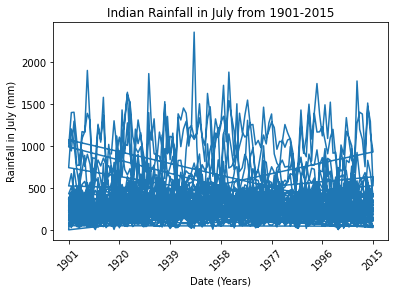

In [27]:
'''This code plots the amount of rainfall received in July for all the years'''

plt.plot(rainfall.Year, rainfall.July)   #ploting year vs july rainfall
plt.xlabel("Date (Years)")               #labeling x-axis
plt.ylabel("Rainfall in July (mm)")      #labeling y-axis
plt.title("Indian Rainfall in July from 1901-2015") #title
plt.xticks(mydate, rotation=45);         #adding an appropriate x-axis scale 

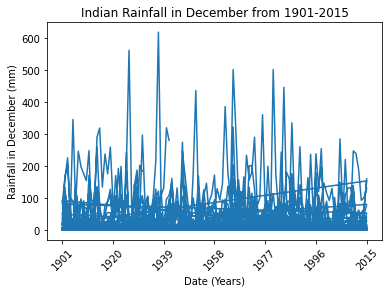

In [28]:
'''This code plots the amount of rainfall received in December for all the years'''

plt.plot(rainfall.Year, rainfall.December) #ploting year vs December  rainfall
plt.xlabel("Date (Years)")                 #labeling x-axis
plt.ylabel("Rainfall in December (mm)")    #labeling y-axis
plt.title("Indian Rainfall in December from 1901-2015") #Title
plt.xticks(mydate, rotation=45);            #adding an appropriate x-axis scale

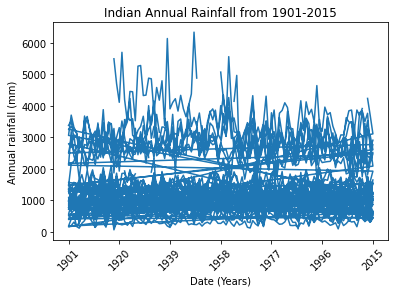

In [29]:
'''This code plots the amount of rainfall received Annualy for all the years'''

plt.plot(rainfall.Year, (rainfall.Annual))     #ploting year vs Annual  rainfall
plt.xlabel("Date (Years)")                     #labeling x-axis
plt.ylabel("Annual rainfall (mm)")             #labeling y-axis
plt.title("Indian Annual Rainfall from 1901-2015") #Title
plt.xticks(mydate, rotation=45);                #adding an appropriate x-axis scale

Looking at the three graphs above, it's almost clear that the highest amount of rainfall was received in the year 1948. Also, the month of July received the highest amount of rainfall compared to December for all the years. 

Now, I want to plot monthly rainfall vs each other. I will begin by ploting months that receive high rainfall and low rainfall. Later, I will focus on low vs high rainfall months specifically December and July. Notice the shape of high vs high, low vs low, and low vs high plots.


**High vs High** and **Low vs Low rainfall months** 

Text(0.5, 1.0, 'Rainfall in November vs December')

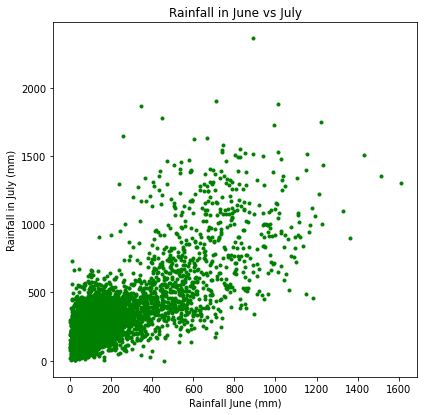

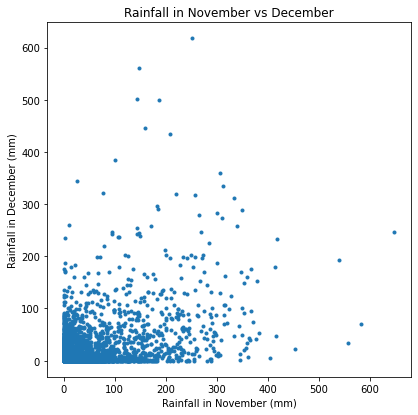

In [30]:
'''This code plots the amount of rainfall received in June and July for all the years'''

plt.figure(figsize=(30, 30))       #size of the curve figure
plt.subplot(4, 4, 1)               #ploting suplot 
plt.plot(rainfall.June, (rainfall.July), ".", c = "g")  #ploting June vs July rainfall
plt.xlabel("Rainfall June (mm)")      #labeling x-axis
plt.ylabel("Rainfall in July (mm)")   #labeling y-axis
plt.title("Rainfall in June vs July") #Title 

plt.figure(figsize=(30, 30))          #size of the curve figure
plt.subplot(4, 4, 2)                  #ploting suplot
plt.plot(rainfall.November, (rainfall.December), ".") #ploting November vs December rainfall
plt.xlabel("Rainfall in November (mm)")   #labeling x-axis
plt.ylabel("Rainfall in December (mm)")    #labeling y-axis
plt.title("Rainfall in November vs December")  #Title

The graph of June vs July shows that the amount of rainfall received in these months is directly proportional in some way. Is it because India receive high rainfall in these months? Also, the graph of December vs November shows that the amount of rainfall received in these months is directly proportional in some way. Is this because India receives low rainfall during this period? To answer this question, I decided to plot a graph of low vs high rainfall months.

Now, I want to compare the amount of rainfall received in December(lowest rainfall month) and July(highest rainfall month) on a graph. Watch closely because I will be using this data for modeling and correlation.

Text(0.5, 1.0, 'Rainfall in December vs July')

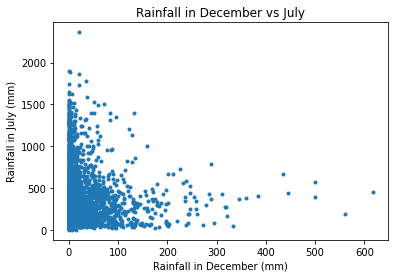

In [31]:
'''This code plots the amount of rainfall received in December and July for all the years'''

plt.plot(rainfall.December, (rainfall.July), ".")    #ploting December vs July rainfall
plt.xlabel("Rainfall in December (mm)")              #labeling x-axis
plt.ylabel("Rainfall in July (mm)")                  #labeling y-axis
plt.title("Rainfall in December vs July")            #Title

Good. This is what I expected. I expected the graph of december vs July rainfall to be inversely proportional compared to those of June vs July and December vs November that are directly propertional. Therefore, I expect the slope of this curve to be negative.

### Element 5


#### Fitting a curve

Using December and July curves, I want to plot a fitting line on top of my December vs July curve.

Well, one of the challenges that I encoutered using this data set was unrecorded data. To solve this, I had to replace all unrecorded data subsets for these two months with zero. I could not use this method, dropna(), because the number of unrecorded data for different months was not the same and this could affect the x and y values when fitting a curve.

In [32]:
'''This code replaces all NaN data with zero and returns the length of the new data'''

december = rainfall.December.replace(np.nan, 0)   #replacing unrecorded data in December with zero 
july = rainfall.July.replace(np.nan, 0)           #replacing unrecorded data in July with zero
print(len(july), len(december) )                  #returning the length of the new data

4116 4116


Well, I can now go ahead to fit a line on the december vs july graph.

The slope of this curve is -0.118534 and the y intercept is 348.855198


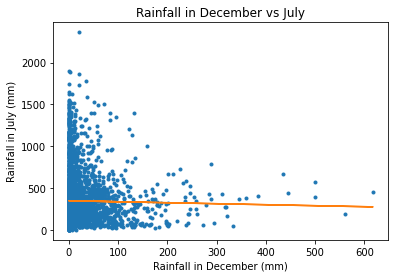

In [33]:
'''This code plots a fit line on the December vs July curve 
   and return the slope and y intercept parameters'''

p = np.polyfit(december, july, 1)         #1st polynomial fit line curve
bestfit = p[0]*december + p[1]            #calculating the bestline equation
plt.plot(december, july, ".")             #ploting december vs july curve
plt.plot(december, bestfit)               #ploting a fit line curve
plt.xlabel("Rainfall in December (mm)")   #labeling x-axis
plt.ylabel("Rainfall in July (mm)")       #labeling y-axis
plt.title("Rainfall in December vs July") #Title
print("The slope of this curve is %f and the y intercept is %f" %(p[0], p[1])) #returning the slope and y-intercept

I mentioned that December and July are Inversely proportional. Inversely proportional variables have negative slopes. After looking at the slope of this curve, -0.118534, I can confirm that December and July are inversely proportional. That is, December is a low rainfall month and July is a high rainfall month. I also Identified this while working on correlation in the cells below -after residuals.


### Element 6

#### Residuals

After ploting a fit line, I want to access the validity of my model using residuals

The slope of this curve is -0.118534 and the y intercept is 348.855198


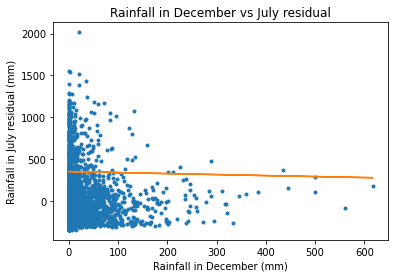

In [34]:
'''This code plots a fit line on the December vs July curve 
and return the slope and y intercept parameters'''

p = np.polyfit(december, july, 1)    #1st polynomial fit line curve
bestfit = p[0]*december + p[1]       #calculating the bestline 
residuals = july - bestfit           #calculating residuals
plt.plot(december, residuals, ".")   #ploting december vs residual curve
plt.plot(december, bestfit)          #ploting the best line curve
plt.xlabel("Rainfall in December (mm)")           #labeling x-axis
plt.ylabel("Rainfall in July residual (mm)")      #labeling y-axis
plt.title("Rainfall in December vs July residual") #Title
print("The slope of this curve is %f and the y intercept is %f" %(p[0], p[1])) ##returning the slope and y-intercept

#### Correlation  and Test Suite

Now, I want to use the correlation coeffient to identify the correlation between the amount of rainfall in December and July as well as months around December and July.

In [35]:
rainfall.December.corr(rainfall.July) #correlation between rainfall in dec and july

-0.019427065767893357

In [36]:
rainfall.June.corr(rainfall.July)  #correlation between rainfall in Jun and july

0.7412853933626072

In [37]:
rainfall.November.corr(rainfall.December) #correlation between rainfall in nove and dec

0.45140657807895135

In [38]:
# This code plot a colored table of all correlations
#between the pairs of months columns my data frame

monthly = rainfall.loc[:,"January":"December"]  #variable containing all the months raws
monthly.corr(method = 'pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1) #ploting a colored table

,January,February,March,April,May,June,July,August,September,October,November,December
January,1.0,0.46,0.4,0.21,0.13,-0.034,-0.052,0.012,0.024,0.012,0.067,0.22
February,0.46,1.0,0.58,0.37,0.2,0.034,0.016,0.072,0.08,-0.0046,-0.023,0.13
March,0.4,0.58,1.0,0.56,0.36,0.17,0.097,0.14,0.18,0.086,0.0088,0.14
April,0.21,0.37,0.56,1.0,0.65,0.46,0.27,0.26,0.38,0.37,0.17,0.13
May,0.13,0.2,0.36,0.65,1.0,0.57,0.33,0.33,0.49,0.53,0.35,0.25
June,-0.034,0.034,0.17,0.46,0.57,1.0,0.74,0.66,0.55,0.49,0.23,0.089
July,-0.052,0.016,0.097,0.27,0.33,0.74,1.0,0.69,0.51,0.3,0.043,-0.019
August,0.012,0.072,0.14,0.26,0.33,0.66,0.69,1.0,0.5,0.25,0.017,0.0016
September,0.024,0.08,0.18,0.38,0.49,0.55,0.51,0.5,1.0,0.38,0.15,0.11
October,0.012,-0.0046,0.086,0.37,0.53,0.49,0.3,0.25,0.38,1.0,0.48,0.28


Well, the correlation between months with high rainfall is larger. Also,the correlation between months with lower rainfall is larger. However, the correlation between months with high rainfall vs those with lower rainfall is smaller. This summarises my argument that India receives higher rainfall from May to September and lower rainfall from November to March. Further, India receives the highest rainfall in July and low rainfall in December.

### Element 7

#### Dictionaries

Using dictionaries, I want to use some of the months names as keys and their data in the table as values. 

In [39]:
'''Ths code create two keys and their corresponding value and return the keys and values'''

monthly_dict ={"July":rainfall.July, "Dec":rainfall.December}  #dictionary with keys july and Dec and
                                                                #values rainfall.July and rainfall.December
monthly_dict.keys()    #returning the keys

dict_keys(['July', 'Dec'])

In [40]:
 monthly_dict["July"], monthly_dict["Dec"]  #returning values inside July and Dec keys

(0       365.1
 1       228.9
 2       728.4
 3       502.0
 4       368.7
         ...  
 4111    350.2
 4112    231.5
 4113    296.4
 4114    116.1
 4115    257.5
 Name: July, Length: 4116, dtype: float64,
 0        33.6
 1       160.5
 2       225.0
 3        40.1
 4       344.7
         ...  
 4111     14.9
 4112      8.8
 4113     26.7
 4114     62.3
 4115    159.0
 Name: December, Length: 4116, dtype: float64)

### Element 8
**Adding new columns and Combining data**

Using the "monthly_dict" dictionaries above, I want to calculate the average daily rainfall in July for all the years and combined them in an array. I will also do that for the average daily rainfall in December. After that, I will add two new  columns to specific positions of my table.

In [41]:
'''This code calculate the average daily rainfall in July and December for all the years
and add them to an empty array using for loop'''

dailyJuly = []                  #creating an empty array 'dailyJuly'
for j in monthly_dict["July"]:  #creating a for loop condition for each item in the key 'July'
    dailyJuly.append(j/30)      #adding july daily rainfall to my array

dailyDec = []                   #creating an empty array 'dailyDec'
for f in monthly_dict["Dec"]:   #creating a for loop condition for each item in the key 'Dec'
    dailyDec.append(f/31)       #adding dec daily rainfall to my array

In [42]:
'''This code add new columns to my original rainfall table'''

rainfall.insert(9, "AverageDailyInJuly", dailyJuly)   #inserting a new column called 'AverageDailyInJuly' to position 9.
rainfall.insert(15, "AverageDailyInDec", dailyDec)    #inserting a new column called 'AverageDailyInDec' to position 15.

Now, I want to return my new table if the column have been added to the right position. You will need to scroll horizontally to see all all columns.

In [43]:
#returning the first five raws in a table using head()
rainfall.head(5)

,Subdivision,Year,January,February,March,April,May,June,July,AverageDailyInJuly,...,September,October,November,December,AverageDailyInDec,Annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,12.170000,...,332.6,388.5,558.2,33.6,1.083871,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,7.630000,...,666.2,197.2,359.0,160.5,5.177419,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,24.280000,...,339.0,181.2,284.4,225.0,7.258065,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,16.733333,...,820.4,222.2,308.7,40.1,1.293548,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,12.290000,...,297.0,260.7,25.4,344.7,11.119355,2566.7,1.3,309.7,1624.9,630.8


### Element 9


#### Numerical Integration


Now I want to Integrate my data. I will be using the new 'averagedailyJuly' column with its corresponding 'July' column. This will return the total amount of rainfall received in July for all the years. Also, I will test the validity of my integration formular using averagesailyInDec and Dec columns.


I will first find the total amount of rainfall received in July for all the years using the 'averagedailyInJuly' column

In [44]:
#Finding the total amount of average daily rainfall received in July for all the years
#Calculating the total amount of rainfall received in July by multplying total average by 30 days 
daysInJuly  = 30                              #number of days in july
sum(rainfall['AverageDailyInJuly'].dropna()) * daysInJuly #calculating the total rainfall received in July

1426703.7000000004

Now I want to confirm if this is actually the correct sum by finding the total amount of rainfall received in July using the 'July' column directly.

In [45]:
sum(rainfall.July.dropna()) #finding total amount of rainfall received in July

1426703.6999999983

Perfect, I actually got very closer answers. 

#### Test Suite
My exact answer should be between the two values when I use Integration.

Now I want to use integration to find the total amount of rainfall received in July for all the years. I will be using the equation **y = mx** where **y** is july monthly rainfall(rainfall.July), **x** is average daily rainfall in july(rainfall["averagedailyInJuly]), and m is total the number of days in July(30). I will find the total amount of rainfall received in july, for all the years, by finding the area under the curve *y = mx*.

In [46]:
'''This code returns the total amount of rainfall received in July for all the years.'''
width = 1                           #interval of year for the years 1901 to 2015
daysInJuly  = 30                    #number of days in july
x = rainfall['AverageDailyInJuly']  #assigning x to 'AveragedailyInuly' column
y = daysInJuly * x                  #creating a variable y and assigning it 30 * x 
np.sum(y)*width                     #total sum of y (rainfall.July)

1426703.7

That was actually more accurate. I now want to use a function that returns the area under y=mx curve as the total amount of rainfall received in july.

In [47]:
'''This code creates a function that returns the total amount of rainfall 
received in a given month for all the years.'''

width = 1                           #interval of year for the years 1901 to 2015
daysInJuly  = 30                    #number of days in july
x = rainfall['AverageDailyInJuly']  #assigning x to 'AveragedailyInJuly' column
def totalsum(total, days):               #defining a function that takes in two variable
    return days * total                  #calculating the rainfall.July
np.sum(totalsum(x, 30)*width)                #total sum of rainfall in July total

1426703.7

Perfect, that is actually the total amount of rainfall received in July for all the years.


#### Test Suite

Lastly, I want to test the total amounf of rainfall received in december using two different methods to check if my integration formula is correct. The values should be very close after using different methods. Remember that the number of days in december is 31.

In [48]:
'''This code returns the total amount of rainfall received in India in December
for all the years using two different methods'''

d = rainfall['AverageDailyInDec']      #creating a variable 'd' and assigning it to all the data
                                       #in 'AverageDailyInDec'column
sum(rainfall.December.dropna()), np.sum(totalsum(d, 31)*width)  #returning the total amount of rainfall in Dec
                                                                 #for all the years using two methods

(77482.5999999998, 77482.6)

Perfect, this is actually the same answer. This proves that my integration method is working and it is more accurate to use. 

### Conclusion


* ```In conclusion, I have noticed that India receives high rainfall from May to September and Low rainfall from November to March. I confirmed this by comparing the sum of the monthly rainfall received for all the years and the maximum amount for each month for all the years. Also, I have applied the maximum values together with annual amount of rainfall to identify 1948 as the year in which India receive low rainfall. Through all this, I have answered my project question and this confirms that India doesn't experience double-maxima rainfall yearly hence it is not located in an Equitorial Climate Zone.```